In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn.decomposition
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
MergedData0 = pd.read_csv('Data.csv', index_col=0);
MergedData1 = MergedData0.iloc[:, :-1]
y = pd.read_csv("lung_training_genes_set.csv", index_col='gene')
y.rename_axis("DepMap_ID")
y = y == 'positive'
data = MergedData1.merge(y, how='inner', left_index=True, right_index=True)
Data = data.iloc[:, :-1]
y = data.iloc[:, -1]
display(Data)
display(y)

,ACH-000001_x,ACH-000004_x,ACH-000005_x,ACH-000007_x,ACH-000009_x,ACH-000011_x,ACH-000012_x,ACH-000013_x,ACH-000014_x,ACH-000015_x,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
AARSD1,0.014633,0.088367,0.158961,0.068823,0.310903,0.200716,0.130371,0.074307,0.211617,0.061772,...,5.958843,5.149747,5.951168,5.877008,6.145881,6.647171,4.320485,5.039577,5.185867,4.813012
ABCC1,0.054252,0.186955,0.029162,0.012003,0.018367,0.015148,0.026059,0.007718,0.009485,0.047440,...,4.636335,5.960465,4.406673,5.581653,4.113534,4.480911,3.740928,6.244126,4.234195,4.346957
ABHD5,0.015684,0.013930,0.029837,0.008638,0.007884,0.014389,0.015192,0.025539,0.052454,0.013927,...,4.544733,3.382667,4.394377,3.665620,2.538538,3.593354,4.244126,4.084064,4.021480,1.790772
ABRA,0.011264,0.088052,0.001308,0.023693,0.043935,0.032149,0.086439,0.035433,0.009032,0.009382,...,0.000000,0.000000,0.000000,0.014355,0.000000,0.150560,0.014355,0.000000,0.000000,0.000000
ABRA,0.011264,0.088052,0.001308,0.023693,0.043935,0.032149,0.086439,0.035433,0.009032,0.009382,...,0.000000,0.000000,0.000000,0.014355,0.000000,0.150560,0.014355,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF875,0.812435,0.007931,0.000986,0.015101,0.063617,0.020492,0.069496,0.656888,0.006835,0.089348,...,5.205158,4.089159,3.304511,4.583760,4.097611,4.250204,4.450881,3.436961,4.376429,4.854993
ZSCAN4,0.042037,0.007619,0.002837,0.002026,0.025120,0.023477,0.020980,0.032201,0.074057,0.005571,...,0.028569,0.028569,0.000000,0.000000,0.014355,0.000000,0.056584,0.014355,0.028569,0.000000
ZSCAN4,0.042037,0.007619,0.002837,0.002026,0.025120,0.023477,0.020980,0.032201,0.074057,0.005571,...,0.028569,0.028569,0.000000,0.000000,0.014355,0.000000,0.056584,0.014355,0.028569,0.000000
ZWINT,0.080585,0.230569,0.274568,0.615338,0.405712,0.535260,0.966785,0.010011,0.937716,0.120301,...,6.078524,5.747656,7.031991,6.802710,6.051155,7.784504,7.004951,5.780835,5.515069,7.090007


AARSD1    False
ABCC1     False
ABHD5     False
ABRA      False
ABRA      False
          ...  
ZNF875    False
ZSCAN4    False
ZSCAN4    False
ZWINT     False
ZWINT     False
Name: label, Length: 818, dtype: bool

In [3]:
data_gene_dep = Data.iloc[:, 0:1086]
data_gene_dep;
data_gene_eff = Data.iloc[:, 1087:2172]
data_gene_eff;
data_express = Data.iloc[:, 2173:3578]
data_express;

In [4]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X1 = pca.fit_transform(data_gene_dep)
print(pca.explained_variance_ratio_)

[0.808155   0.01412096 0.00957975 0.00768487 0.00723295 0.00704766
 0.00513337 0.00452754]


In [5]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X2 = pca.fit_transform(data_gene_eff)
print(pca.explained_variance_ratio_)

[0.85168833 0.00842562 0.00713609 0.00627276 0.00580671 0.00450558
 0.0042059  0.00401386]


In [6]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X3 = pca.fit_transform(data_express)
print(pca.explained_variance_ratio_)

[0.80517441 0.02739278 0.01962311 0.01299371 0.00592063 0.00477013
 0.00438124 0.00408435]


In [7]:
X4 = np.concatenate((X1, X2, X3), axis=1)
print(X4.shape)

(818, 24)


(340, 24)
(340,)
167


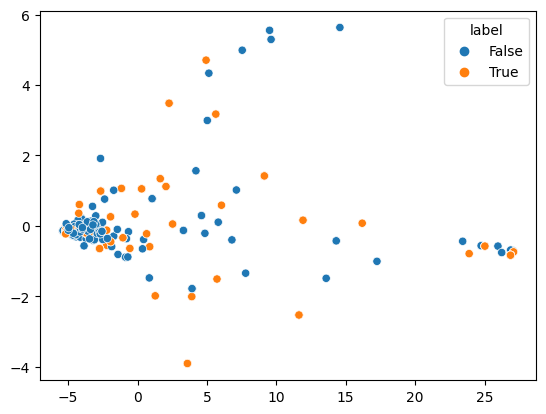

In [8]:
select = np.maximum(y, np.random.rand(len(y)) < sum(y)/(len(y) - sum(y)))
X4 = X4[select]
y = y[select]
print(X4.shape)
print(y.shape)
print(sum(y))
sns.scatterplot(x= X4[:,0], y=X4[:,1], hue=y)
plt.show()

In [9]:
# Get the training and test data
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3)

# Fit the model
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_rt = model.predict_proba(X_test)[:, 1]

accuracy = str(accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rt)
auc_value = str(auc(fpr, tpr))
precision = str(precision_score(y_test, y_pred))
recall = str(recall_score(y_test, y_pred))
f1score = str(f1_score(y_test, y_pred, average="weighted"))

Accuracy:0.6568627450980392
Precision:0.6382978723404256
Recall:0.625


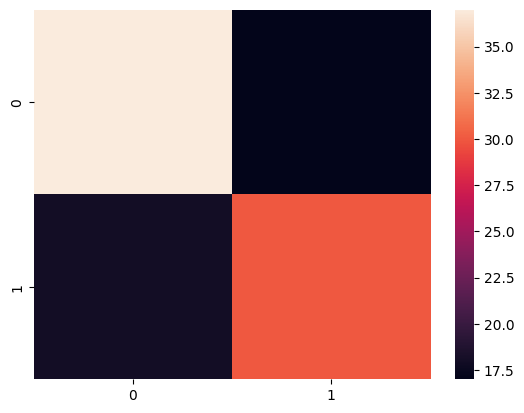

[[37 17]
 [18 30]]


In [10]:
print("Accuracy:" + accuracy)
print("Precision:" + precision)
print("Recall:" + recall)

conf_mx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mx)
plt.show()

print(conf_mx)

In [11]:
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [12]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 150)               3750      
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 dense_2 (Dense)             (None, 8)                 608       
                                                                 
Total params: 15,683
Trainable params: 15,683
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [16]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test),
                    callbacks=[expon_lr])

Epoch 1/5
8/8 [==============================] - 3s 155ms/step - loss: 2.2588 - accuracy: 0.4118 - val_loss: 2.2939 - val_accuracy: 0.5000
Epoch 2/5
8/8 [==============================] - 0s 44ms/step - loss: 1.8336 - accuracy: 0.4328 - val_loss: 1.6598 - val_accuracy: 0.5588
Epoch 3/5
8/8 [==============================] - 0s 66ms/step - loss: 1.7611 - accuracy: 0.4412 - val_loss: 1.2753 - val_accuracy: 0.6275
Epoch 4/5
8/8 [==============================] - 0s 47ms/step - loss: 1.3045 - accuracy: 0.5000 - val_loss: 1.0232 - val_accuracy: 0.5490
Epoch 5/5
8/8 [==============================] - 0s 59ms/step - loss: 1.0881 - accuracy: 0.5378 - val_loss: 2.0487 - val_accuracy: 0.4412


Text(0, 0.5, 'Loss')

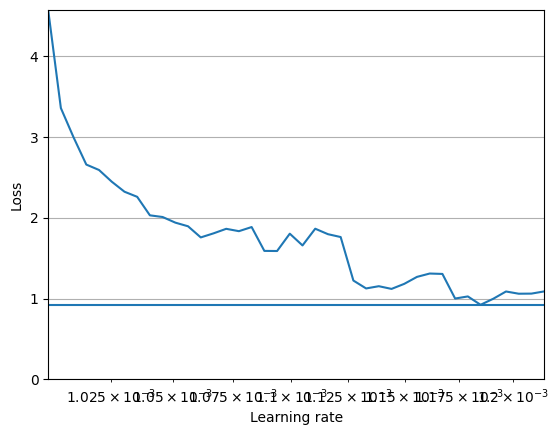

In [17]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [18]:
print("Min Loss: " + str(min(expon_lr.losses)))
print("Best learning rate: " + str(expon_lr.rates[np.argmin(expon_lr.losses)]))
alpha = expon_lr.rates[np.argmin(expon_lr.losses)];

Min Loss: 0.9227216839790344
Best learning rate: 0.001184803


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [21]:
#Using optimized learning rate: 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=alpha),
              metrics=["accuracy"])

In [22]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "lungtypes_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\lungtypes_logs\\run_001'

In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.0005, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("lungtypes_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/200
8/8 [==============================] - 2s 75ms/step - loss: 3.2494 - accuracy: 0.3235 - val_loss: 2.7896 - val_accuracy: 0.4510
Epoch 2/200
8/8 [==============================] - 0s 44ms/step - loss: 1.8879 - accuracy: 0.4328 - val_loss: 1.9720 - val_accuracy: 0.4902
Epoch 3/200
8/8 [==============================] - 0s 40ms/step - loss: 1.6845 - accuracy: 0.4370 - val_loss: 1.1145 - val_accuracy: 0.5784
Epoch 4/200
8/8 [==============================] - 0s 54ms/step - loss: 1.2434 - accuracy: 0.4958 - val_loss: 1.0070 - val_accuracy: 0.5294
Epoch 5/200
8/8 [==============================] - 0s 56ms/step - loss: 1.1357 - accuracy: 0.5420 - val_loss: 2.0973 - val_accuracy: 0.4118
Epoch 6/200
8/8 [==============================] - 0s 49ms/step - loss: 1.1234 - accuracy: 0.5504 - val_loss: 1.3422 - val_accuracy: 0.5490
Epoch 7/200
8/8 [==============================] - 0s 30ms/step - loss: 1.0218 - accuracy: 0.5798 - val_loss: 1.0285 - val_accuracy: 0.6078
Epoch 8/200
8/8 [===

In [24]:
model = keras.models.load_model("lungtypes_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_train, y_train)

8/8 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.6849


[0.6110876202583313, 0.6848739385604858]

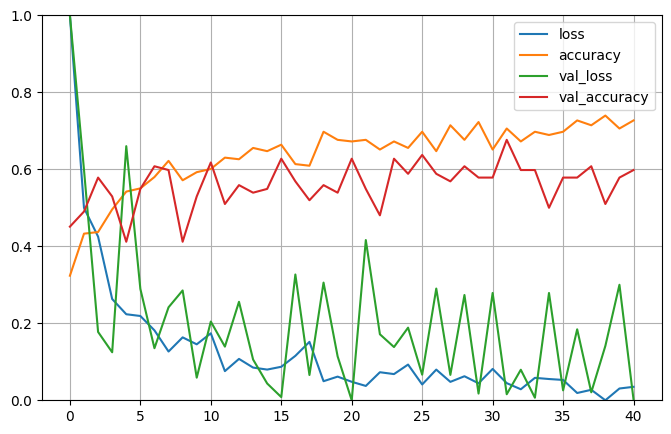

In [25]:
#Plot of Loss, Val_Loss, Accuracy and Val_Accuracy, with loss and val_loss normalized by max and min
hist = pd.DataFrame(history.history)#.plot(figsize=(8, 5))
hist['loss'] = (hist['loss'] - hist['loss'].min()) / (hist['loss'].max() - hist['loss'].min())
hist['val_loss'] = (hist['val_loss'] - hist['val_loss'].min()) / (hist['val_loss'].max() - hist['val_loss'].min())
hist.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()